In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import itertools as it
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок


In [442]:
init_notebook_mode(connected=True)
cf.go_offline()


In [443]:
# блок предобработки


def edu_function(x):
    '''Приводим виды образований к понятному виду для промежуточного анализа'''
    if x == 0:
        return 'no education'
    elif x == 1:
        return '1-4 classes'
    elif x == 2:
        return '5-9 classes'
    elif x == 3:
        return 'middle or 11 classes'
    elif x == 4:
        return 'higher'
    elif x == 'nan':
        return None


def get_boxplot(column):
    '''Строим боксплот для номинативных переменных'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].
                              isin(stud.loc[:, column].
                              value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    '''Ищем статистически значимые значения для номинативных колонок'''
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(it.combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue\
                    <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  column)
            break


In [444]:
stud = pd.read_csv('stud_math.csv')


In [445]:
display(stud.head(10))
stud.info()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

### Числовые значения:
- age- аббревиатура школы, в которой учится ученик
- Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- studytime granular - *???*
- famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime - свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absenses - количество пропущенных занятий
- score - баллы по госэкзамену по математике

### Текстовые значения:
- school - аббревиатура школы, в которой учится ученик
- sex - пол ученика ('F' - женский, 'M' - мужской)          
- address - тип адреса ученика ('U' - городской, 'R' - за городом)            
- famsize - размер семьи('LE3' <= 3, 'GT3' >3)             
- Pstatus - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)            
- Mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)           
- Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)          
- reason причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)                
- guardian - опекун ('mother' - мать, 'father' - отец, 'other' - другое)        
- schoolsup - дополнительная образовательная поддержка (yes или no)     
- famsup - семейная образовательная поддержка (yes или no)        
- paid - дополнительные платные занятия по математике (yes или no)                  
- activities - дополнительные внеучебные занятия (yes или no)        
- nursery - посещал детский сад (yes или no)         
- higher - хочет получить высшее образование (yes или no)                
- internet - наличие интернета дома (yes или no)          
- romantic - в романтических отношениях (yes или no)          

## <span style="color:darkblue">Школа</span>

In [446]:
display(pd.DataFrame(stud.school.value_counts()))


,school
GP,349
MS,46


### Пустых значений нет, всего два варианта

## <span style="color:darkblue">Пол</span>

In [447]:
display(pd.DataFrame(stud.sex.value_counts()))


,sex
F,208
M,187


### Пустых значений нет

## <span style="color:darkblue">Возраст</span>

In [448]:
display(pd.DataFrame(stud.age.describe().reset_index()))


,index,age
0,count,395.000000
1,mean,16.696203
2,std,1.276043
3,min,15.000000
4,25%,16.000000
5,50%,17.000000
6,75%,18.000000
7,max,22.000000


In [449]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'Межквартильный размах: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.
    format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, Межквартильный размах: 2.0,  Границы выбросов: [13.0, 21.0].


In [450]:
stud[stud.age == 22]  # это выброс? возможно ученик оставался на второй год??
# stud = stud.loc[stud.age <= 21]
# если решу, что выброс - надо раскомментить строчку


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1859ef146c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1859eed9048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1859eec04c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1859eed6d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1859eed6e08>],
 'means': []}

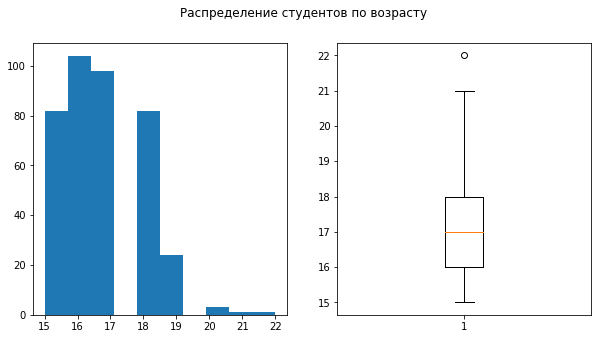

In [451]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Распределение студентов по возрасту')
ax1.hist(stud.age)
ax2.boxplot(stud.age)


### Возраст указан у всех, есть 1 выброс - 22 года. Надо решить - убираем или нет

## <span style="color:darkblue">Адрес</span>

In [452]:
stud.address = stud.address.astype(str).\
               apply(lambda x: None if x.strip() == '' else x)

In [453]:
display(pd.DataFrame(stud.address.describe(include='object')))


,address
count,395
unique,3
top,U
freq,295


In [454]:
data = stud.groupby(['address'])['school'].count().reset_index()
data.columns = ['address', 'value_count']
display(data)


,address,value_count
0,R,83
1,U,295
2,nan,17


### Всего два варианта, 17 пустых строк

## <span style="color:darkblue">Размер семьи</span>

In [455]:
stud.famsize = stud.famsize.astype(str).\
               apply(lambda x: None if x.strip() == '' else x)


In [456]:
display(pd.DataFrame(stud.famsize.describe(include='object')))


,famsize
count,395
unique,3
top,GT3
freq,261


In [457]:
data = stud.groupby(['famsize'])['school'].count().reset_index()
data.columns = ['famsize', 'value_count']
display(data)


,famsize,value_count
0,GT3,261
1,LE3,107
2,nan,27


### Всего два варианта, 27 пустых строк

## <span style="color:darkblue">Статус совместного проживания родителей</span>

In [458]:
stud.Pstatus = stud.Pstatus.astype(str).\
               apply(lambda x: None if x.strip() == '' else x)


In [459]:
display(pd.DataFrame(stud.Pstatus.describe(include='object')))


,Pstatus
count,395
unique,3
top,T
freq,314


In [460]:
data = stud.groupby(['Pstatus'])['school'].count().reset_index()
data.columns = ['Pstatus', 'value_count']
display(data)


,Pstatus,value_count
0,A,36
1,T,314
2,nan,45


### Всего два варианта, 45 пустых строк

## <span style="color:darkblue">Образование матери</span>

In [461]:
stud[['Medu', 'Mjob']][stud.Medu.isna()]  # смотрим на пропуски


,Medu,Mjob
92,NaN,other
193,NaN,services
239,NaN,other


In [462]:
display(pd.DataFrame(stud.Medu.describe()))


,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [463]:
data = stud.groupby(['Medu', 'Mjob'])['school'].count().reset_index()
data.columns = ['Medu', 'Mjob', 'value_count']
data.Medu = data.Medu.apply(edu_function)
# приводим образование к понятному виду


In [464]:
data[data.Mjob == 'services'].sort_values(by='value_count', ascending=False)


,Medu,Mjob,value_count
13,middle or 11 classes,services,38
9,5-9 classes,services,30
18,higher,services,24
5,1-4 classes,services,5


In [465]:
data[data.Mjob == 'other'].sort_values(by='value_count', ascending=False)


,Medu,Mjob,value_count
8,5-9 classes,other,45
12,middle or 11 classes,other,37
4,1-4 classes,other,26
17,higher,other,22
1,no education,other,1


In [466]:
stud['Medu'].loc[(stud.Medu.isna()) & (stud.Mjob == 'services')] = 3
# у большинства работников Госслужбы образование
# среднеспециальное или 11 классов


In [467]:
stud['Medu'].loc[(stud.Medu.isna()) & (stud.Mjob == 'other')] = 2
# у большинства работников из других сфер образование 5-9 классов


In [468]:
stud[['Medu', 'Mjob']][stud.Medu.isna()]  # проверяем, что пропуски заполнены


,Medu,Mjob


In [469]:
display(pd.DataFrame(stud.Medu.describe()))


,Medu
count,395.000000
mean,2.746835
std,1.095310
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [470]:
IQR = stud.Medu.quantile(0.75) - stud.Medu.quantile(0.25)
perc25 = stud.Medu.quantile(0.25)
perc75 = stud.Medu.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'Межквартильный размах: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.
    format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, Межквартильный размах: 2.0,  Границы выбросов: [-1.0, 7.0].


### Заменили три пропущенных значения типа образования, основываясь на типе работы. Проверили, что остальные показатели нормальны (нет выбросов, несоответсвующих значений)

## <span style="color:darkblue">Образование отца</span>

In [471]:
data = stud[['Fedu', 'Fjob']][stud.Fedu.isna()]  # смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('Fjob')['num'].sum().reset_index().\
                sort_values(by='num', ascending=False)


,Fjob,num
3,services,8
2,other,7
4,teacher,3
0,at_home,2
1,health,2


,Fedu
count,371.000000
mean,2.614555
std,2.228732
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


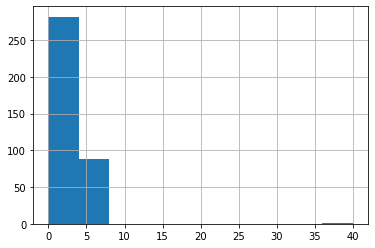

In [472]:
display(pd.DataFrame(stud.Fedu.describe()))
stud['Fedu'].hist()


In [473]:
stud.groupby('Fedu')['school'].count().reset_index().\
    sort_values(by='school', ascending=False)


,Fedu,school
2,2.0,106
3,3.0,96
4,4.0,88
1,1.0,78
0,0.0,2
5,40.0,1


In [474]:
data = stud.groupby(['Fedu', 'Fjob'])['school'].count().reset_index()
data.columns = ['Fedu', 'Fjob', 'value_count']

# приводим образование к понятному виду
data.Fedu = data.Fedu.apply(edu_function)

# смотрим на распределение связки образование-работа
data.sort_values(by='value_count', ascending=False)


,Fedu,Fjob,value_count
7,5-9 classes,other,58
11,middle or 11 classes,other,51
3,1-4 classes,other,48
12,middle or 11 classes,services,31
16,higher,other,30
8,5-9 classes,services,27
18,higher,teacher,25
4,1-4 classes,services,19
17,higher,services,17
15,higher,health,8


In [475]:
data[data.Fjob == 'services'].sort_values(by='value_count',
                                          ascending=False).head(1)


,Fedu,Fjob,value_count
12,middle or 11 classes,services,31


In [476]:
data[data.Fjob == 'other'].sort_values(by='value_count',
                                       ascending=False).head(1)


,Fedu,Fjob,value_count
7,5-9 classes,other,58


In [477]:
data[data.Fjob == 'teacher'].sort_values(by='value_count',
                                         ascending=False).head(1)


,Fedu,Fjob,value_count
18,higher,teacher,25


In [478]:
data[data.Fjob == 'health'].sort_values(by='value_count',
                                        ascending=False).head(1)


,Fedu,Fjob,value_count
15,higher,health,8


In [479]:
data[data.Fjob == 'at_home'].sort_values(by='value_count',
                                         ascending=False).head(1)


,Fedu,Fjob,value_count
5,5-9 classes,at_home,6


In [480]:
stud['Fedu'].loc[(stud.Fedu.isna()) & (stud.Fjob == 'services')] = 3
# у большинства работников Госслужбы образование среднеспециальное
# или 11 классов

stud['Fedu'].loc[(stud.Fedu.isna()) & (stud.Fjob == 'other')] = 2
# у большинства работников из других сфер образование 5-9 классов

stud['Fedu'].loc[(stud.Fedu.isna()) & (stud.Fjob == 'teacher')] = 4
# у большинства учителей образование высшее

stud['Fedu'].loc[(stud.Fedu.isna()) & (stud.Fjob == 'health')] = 4
# у большинства медиков образование высшее

stud['Fedu'].loc[(stud.Fedu.isna()) & (stud.Fjob == 'at_home')] = 2
# у большинства не работающих образование 5-9 классов


In [481]:
stud[['Fedu', 'Fjob']][stud.Fedu.isna()]  # смотрим на пропуски


,Fedu,Fjob
161,NaN,NaN
374,NaN,NaN


In [482]:
stud[stud.Fedu == 40]  # видимо ошибочно введенные данные


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,nan,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [483]:
stud['Fedu'].loc[stud.Fedu == 40] = 2
# у большинства работников из других сфер образование 5-9 классов,
# заменим ошибочное значение на наиболее популярное вэтой сфере


In [484]:
display(pd.DataFrame(stud.Fedu.describe()))


,Fedu
count,393.000000
mean,2.529262
std,1.073704
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


In [485]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'Межквартильный размах: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.
    format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 3.0, Межквартильный размах: 1.0,  Границы выбросов: [0.5, 4.5].


### Заменили пропущенные значения типа образования, основываясь на типе работы. Два значения не смогли определить, так как нет данных о работе. Так же заменили одно некорректное значение, проверили, что остальные показатели нормальны (нет выбросов, несоответсвующих значений)

## <span style="color:darkblue">Работа матери</span>

,Mjob
count,376
unique,5
top,other
freq,133


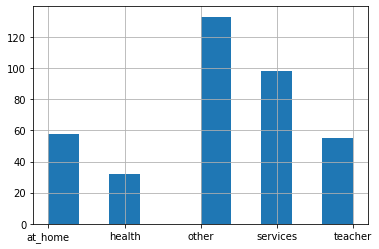

In [486]:
display(pd.DataFrame(stud.Mjob.describe(include='object')))
stud['Mjob'].hist()


In [487]:
data = stud[['Medu', 'Mjob']][stud.Mjob.isna()]  # смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('Medu')['num'].sum().reset_index().sort_values(by='num',
                                                            ascending=False)


,Medu,num
3,4.0,7
2,3.0,6
1,2.0,4
0,1.0,2


In [488]:
stud.Mjob = stud.Mjob.astype(str).\
            apply(lambda x: None if x.strip() == '' else x)
# заменяем пропуски на None


In [489]:
stud.groupby('Mjob')['school'].count().reset_index().\
            sort_values(by='school', ascending=False)


,Mjob,school
3,other,133
4,services,98
0,at_home,58
5,teacher,55
1,health,32
2,nan,19


### В столбце "работа матери" есть 19 пропусков, однозначно определить тип занятости не можем, оставляем так. Остальные значения нормальны.

## <span style="color:darkblue">Работа отца</span>

,Fjob
count,359
unique,5
top,other
freq,197


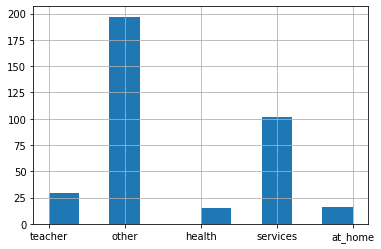

In [490]:
display(pd.DataFrame(stud.Fjob.describe(include='object')))
stud['Fjob'].hist()


In [491]:
data = stud[['Fedu', 'Fjob']][stud.Fjob.isna()]  # смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('Fedu')['num'].sum().reset_index().sort_values(by='num',
                                                            ascending=False)


,Fedu,num
1,2.0,14
0,1.0,7
2,3.0,7
3,4.0,6


In [492]:
stud.Fjob = stud.Fjob.astype(str).\
            apply(lambda x: None if x.strip() == '' else x)
# заменяем пропуски на None


In [493]:
stud.groupby('Fjob')['school'].count().reset_index().\
                sort_values(by='school', ascending=False)


,Fjob,school
3,other,197
4,services,102
2,nan,36
5,teacher,29
0,at_home,16
1,health,15


### В столбце "работа отца" есть 36 пропусков, однозначно определить тип занятости не можем, оставляем так. Остальные значения нормальны.

## <span style="color:darkblue">Причина выбора школы</span>

,reason
count,378
unique,4
top,course
freq,137


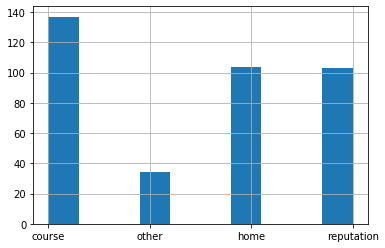

In [494]:
display(pd.DataFrame(stud.reason.describe(include='object')))
stud['reason'].hist()


In [495]:
data = stud[['reason', 'school']][stud.reason.isna()]  # смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().sort_values(by='num',
                                                              ascending=False)


,school,num
0,GP,13
1,MS,4


In [496]:
stud.reason = stud.reason.astype(str).\
                apply(lambda x: None if x.strip() == '' else x)
# заменяем пропуски на None


In [497]:
stud.groupby('reason')['school'].count().reset_index().\
                            sort_values(by='school', ascending=False)


,reason,school
0,course,137
1,home,104
4,reputation,103
3,other,34
2,nan,17


In [498]:
display(pd.DataFrame(stud.reason.describe(include='object')))


,reason
count,395
unique,5
top,course
freq,137


### В столбце "причина выбора школы" есть 17 пропусков, однозначно определить причину для них не можем, оставляем так. Остальные значения нормальны.

## <span style="color:darkblue">Опекун</span>

,guardian
count,364
unique,3
top,mother
freq,250


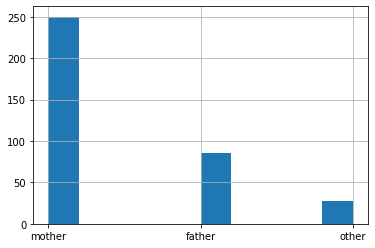

In [499]:
display(pd.DataFrame(stud.guardian.describe(include='object')))
stud['guardian'].hist()


In [500]:
data = stud[['guardian', 'famsize']][stud.guardian.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('famsize')['num'].sum().reset_index().sort_values(by='num',
                                                               ascending=False)


,famsize,num
0,GT3,23
1,LE3,6
2,nan,2


In [501]:
data = stud.groupby(['famsize', 'guardian'])['school'].count().reset_index()
data.columns = ['famsize', 'guardian', 'value_count']
data.sort_values(by='value_count', ascending=False)
# смотрим на распределение связки размер семьи-опекун


,famsize,guardian,value_count
1,GT3,mother,157
4,LE3,mother,72
0,GT3,father,59
3,LE3,father,24
2,GT3,other,22
7,nan,mother,21
5,LE3,other,5
6,nan,father,3
8,nan,other,1


In [502]:
stud.guardian = stud.guardian.astype(str).\
                apply(lambda x: None if x.strip() == '' else x)
# заменяем пропуски на None


In [503]:
stud.groupby('guardian')['school'].count().reset_index().\
            sort_values(by='school', ascending=False)


,guardian,school
1,mother,250
0,father,86
2,nan,31
3,other,28


### В столбце "опекун" есть 31 пропуск, однозначно определить значения для них не можем, оставляем так (можно попробовать заменить на "мать", так как у 63% опекун - мать, но не уверена в этом подходе). Остальные значения нормальны.

## <span style="color:darkblue">время в пути до школы</span>

,traveltime
count,367.000000
mean,1.438692
std,0.694181
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


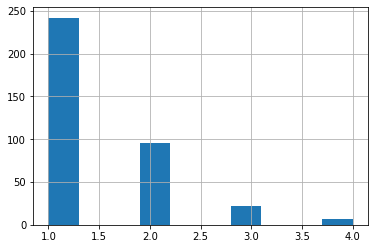

In [504]:
display(pd.DataFrame(stud.traveltime.describe()))
stud['traveltime'].hist()

In [505]:
data = stud[['reason', 'traveltime']][stud.traveltime.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('reason')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,reason,num
0,course,12
1,home,6
4,reputation,6
2,nan,2
3,other,2


In [506]:
stud[['reason', 'traveltime']].loc[(stud.reason == 'home')].\
        groupby('traveltime').count()


,reason
traveltime,
1.0,69
2.0,24
3.0,3
4.0,2


### 70% учеников, у кого причина выбора школы - близость к дому, добираются до школы за 15 минут. Можно заменить у 6 пропусков значение traveltime

In [507]:
stud['traveltime'].loc[(stud.traveltime.isna()) & (stud.reason == 'home')] = 1


In [508]:
data = stud[['reason', 'traveltime']][stud.traveltime.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('reason')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,reason,num
0,course,12
3,reputation,6
1,nan,2
2,other,2


In [509]:
display(pd.DataFrame(stud.traveltime.describe()))


,traveltime
count,373.000000
mean,1.431635
std,0.690774
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


### В столбце "время в пути до школы" есть 22 пропуска, однозначно определить значения для них не можем, оставляем так. Остальные значения нормальны.

## <span style="color:darkblue">время на учёбу помимо школы в неделю</span>

,studytime
count,388.000000
mean,2.038660
std,0.842078
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


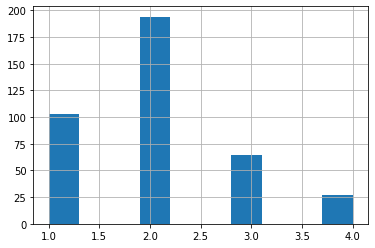

In [510]:
display(pd.DataFrame(stud.studytime.describe()))
stud['studytime'].hist()


In [511]:
data = stud[['school', 'studytime']][stud.studytime.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,7


In [512]:
stud[['school', 'studytime']].groupby('studytime').count()


,school
studytime,
1.0,103
2.0,194
3.0,64
4.0,27


### >75% учеников тратят на учебу вне школы 2-5 часов, думаю, для 7 учеников можем заменить пропущенные значения на этот показатель

In [513]:
stud['studytime'].loc[(stud.studytime.isna())] = 2


In [514]:
display(pd.DataFrame(stud.studytime.describe()))


,studytime
count,395.000000
mean,2.037975
std,0.834580
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


### Все остальные значения нормальные, выбросов нет

## <span style="color:darkblue">количество внеучебных неудач</span>

,failures
count,373.000000
mean,0.337802
std,0.743135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


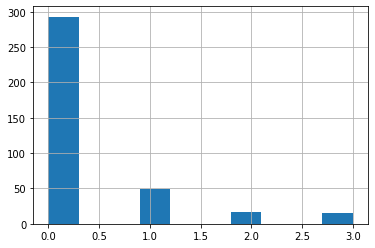

In [515]:
display(pd.DataFrame(stud.failures.describe()))
stud['failures'].hist()


In [516]:
stud[['school', 'failures']].groupby('failures').count()


,school
failures,
0.0,293
1.0,49
2.0,16
3.0,15


In [517]:
data = stud[['school', 'failures']][stud.failures.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,22


### почти у 80% учеников количество внеучебных неудач лежит вне пределов [1, 3]. Возможно имеет смысл заменить пропущенные значения на 0. Заполненные знаяения нормальные, выбросов и некорректных значений нет

## <span style="color:darkblue">дополнительная образовательная поддержка</span>

,schoolsup
count,386
unique,2
top,no
freq,335


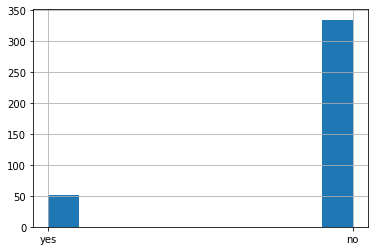

In [518]:
display(pd.DataFrame(stud.schoolsup.describe(include='object')))
stud['schoolsup'].hist()


In [519]:
# приводим значения к числовому виду
stud['schoolsup'].loc[(stud.schoolsup == 'yes')] = 1
stud['schoolsup'].loc[(stud.schoolsup == 'no')] = 0
stud.schoolsup = stud.schoolsup.astype(float)


In [520]:
display(pd.DataFrame(stud.schoolsup.describe()))


,schoolsup
count,386.000000
mean,0.132124
std,0.339065
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [521]:
stud[['school', 'schoolsup']].groupby('schoolsup').count()


,school
schoolsup,
0.0,335
1.0,51


### у 86% учеников нет дополнительной образовательной поддержки. Возможно имеет смысл заменить пропущенные значения на 0. Заполненные значения нормальные, выбросов и некорректных значений нет

## <span style="color:darkblue">семейная образовательная поддержка</span>

,famsup
count,356
unique,2
top,yes
freq,219


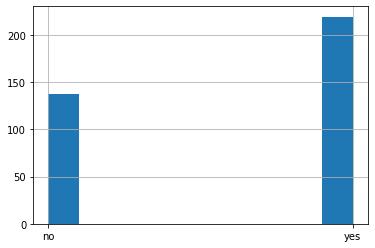

In [522]:
display(pd.DataFrame(stud.famsup.describe(include='object')))
stud['famsup'].hist()


In [523]:
stud[['school', 'famsup']].groupby('famsup').count()


,school
famsup,
no,137
yes,219


In [524]:
stud['famsup'].loc[(stud.famsup == 'yes')] = 1
stud['famsup'].loc[(stud.famsup == 'no')] = 0
stud.famsup = stud.famsup.astype(float)


In [525]:
data = stud[['school', 'famsup']][stud.famsup.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,38
1,MS,1


### Всего 39 пропусков. Все остальные значения приведены к числовому типу

## <span style="color:darkblue">дополнительные платные занятия по математике</span>

,paid
count,355
unique,2
top,no
freq,200


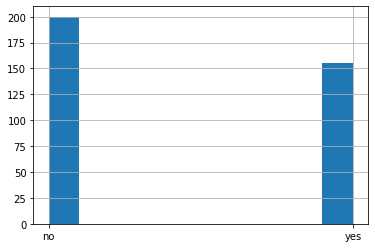

In [526]:
display(pd.DataFrame(stud.paid.describe(include='object')))
stud['paid'].hist()


In [527]:
stud[['school', 'paid']].groupby('paid').count()


,school
paid,
no,200
yes,155


In [528]:
stud['paid'].loc[(stud.paid == 'yes')] = 1
stud['paid'].loc[(stud.paid == 'no')] = 0
stud.paid = stud.paid.astype(float)


In [529]:
data = stud[['school', 'paid']][stud.paid.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,37
1,MS,3


In [530]:
display(pd.DataFrame(stud.paid.describe()))


,paid
count,355.000000
mean,0.436620
std,0.496667
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 40 пропущенных значений, остальные корректные, приведены к числовому виду

## <span style="color:darkblue">дополнительные внеучебные занятия</span>

,activities
count,381
unique,2
top,yes
freq,195


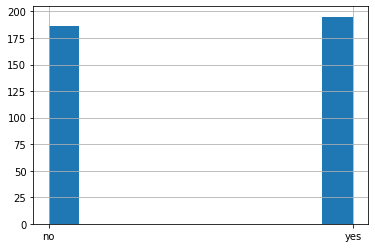

In [531]:
display(pd.DataFrame(stud.activities.describe(include='object')))
stud['activities'].hist()


In [532]:
stud['activities'].loc[(stud.activities == 'yes')] = 1
stud['activities'].loc[(stud.activities == 'no')] = 0
stud.activities = stud.activities.astype(float)


In [533]:
stud[['school', 'activities', 'paid']].groupby(['activities', 'paid']).count()


school
activities paid        
0.0        0.0       96
           1.0       73
1.0        0.0       95
           1.0       78

In [534]:
display(pd.DataFrame(stud.activities.describe(include='object')))


,activities
count,381.000000
mean,0.511811
std,0.500518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Интересно, что количество платных занятий по математике примерно одинаково распределено в группах учеников, у которых есть внеучебные занятия и у которых их нет. Эти показатели не взаимосвязаны?
### Пропущено 14 значений, все остальные - нормальные

## <span style="color:darkblue">посещал детский сад</span>

,nursery
count,379
unique,2
top,yes
freq,300


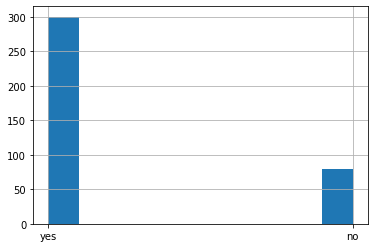

In [535]:
display(pd.DataFrame(stud.nursery.describe(include='object')))
stud['nursery'].hist()


In [536]:
stud[['school', 'nursery']].groupby('nursery').count()


,school
nursery,
no,79
yes,300


In [537]:
stud['nursery'].loc[(stud.nursery == 'yes')] = 1
stud['nursery'].loc[(stud.nursery == 'no')] = 0
stud.nursery = stud.nursery.astype(float)


In [538]:
display(pd.DataFrame(stud.nursery.describe(include='object')))


,nursery
count,379.000000
mean,0.791557
std,0.406732
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [539]:
data = stud[['school', 'nursery']][stud.nursery.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
        sort_values(by='num', ascending=False)


,school,num
0,GP,12
1,MS,4


In [540]:
stud[['school', 'nursery', 'sex']].groupby(['school', 'nursery'])['sex'].\
                                    count().reset_index()


,school,nursery,sex
0,GP,0.0,65
1,GP,1.0,272
2,MS,0.0,14
3,MS,1.0,28


### Пропущено 16 значений, остальные в норме. Большинство учеников школы GP посещали детский сад, но не уверена, что на основании этого можно 12 пропущенным значениям присвоить "посещение детского сада"

## <span style="color:darkblue">Неизвестное поле studytime, granular</span>

,"studytime, granular"
count,388.000000
mean,-6.115979
std,2.526235
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


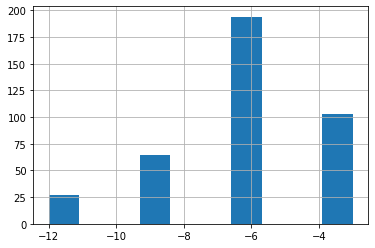

In [541]:
display(pd.DataFrame(stud['studytime, granular'].describe(include='object')))
stud['studytime, granular'].hist()


In [542]:
data = stud[['studytime, granular', 'studytime']]
data['studytime, granular'] = data['studytime, granular'] * (-1)
# приводим все значения к положительным

data.groupby(['studytime, granular'])['studytime'].count().reset_index()


,"studytime, granular",studytime
0,3.0,103
1,6.0,194
2,9.0,64
3,12.0,27


In [543]:
data.corr()


,"studytime, granular",studytime
"studytime, granular",1.0,1.0
studytime,1.0,1.0


In [544]:
stud[['studytime, granular', 'studytime']][stud.studytime.isna()]
# смотрим на пропуски в studytime


,"studytime, granular",studytime


In [545]:
stud.drop(['studytime, granular'], inplace=True, axis=1)
# удаляем ненужный столбец


### Поле studytime, granular полностью коррелирует с полем studytime, заполнить пропуски на его значениях не получится. Так что можем его просто удалять из дальнейшего анализа.

## <span style="color:darkblue">хочет получить высшее образование </span>

,higher
count,375
unique,2
top,yes
freq,356


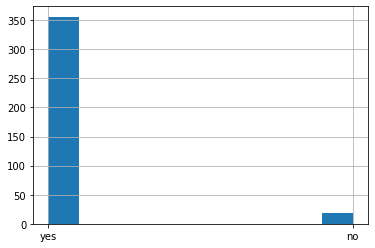

In [546]:
display(pd.DataFrame(stud['higher'].describe(include='object')))
stud['higher'].hist()


In [547]:
stud['higher'].loc[(stud.higher == 'yes')] = 1
stud['higher'].loc[(stud.higher == 'no')] = 0
stud.higher = stud.higher.astype(float)


In [548]:
display(pd.DataFrame(stud['higher'].describe(include='object')))


,higher
count,375.000000
mean,0.949333
std,0.219609
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [549]:
stud[['school', 'higher', 'sex']].groupby(['school', 'higher'])['sex'].\
            count().reset_index()


,school,higher,sex
0,GP,0.0,16
1,GP,1.0,316
2,MS,0.0,3
3,MS,1.0,40


### Привели все имеющиеся значения к числовому формату, осталось 20 пропущенных

## <span style="color:darkblue">наличие интернета дома</span>

,internet
count,361
unique,2
top,yes
freq,305


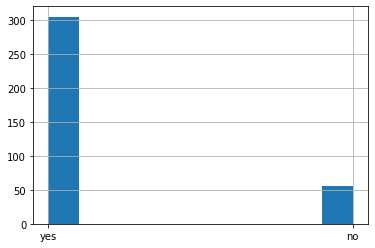

In [550]:
display(pd.DataFrame(stud['internet'].describe(include='object')))
stud['internet'].hist()


In [551]:
stud['internet'].loc[(stud.internet == 'yes')] = 1
stud['internet'].loc[(stud.internet == 'no')] = 0
stud.internet = stud.internet.astype(float)


In [552]:
display(pd.DataFrame(stud['internet'].describe(include='object')))


,internet
count,361.000000
mean,0.844875
std,0.362526
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [553]:
stud[['address', 'internet', 'sex']].groupby(['address', 'internet'])['sex'].\
            count().reset_index()


,address,internet,sex
0,R,0.0,23
1,R,1.0,54
2,U,0.0,31
3,U,1.0,237
4,nan,0.0,2
5,nan,1.0,14


In [554]:
data = stud[['address', 'internet']][stud.internet.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby(['address'])['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,address,num
1,U,27
0,R,6
2,nan,1


### Привели все имеющиеся значения к числовому формату, осталось 34 пропущенных

## <span style="color:darkblue">в романтических отношениях</span>

,romantic
count,364
unique,2
top,no
freq,240


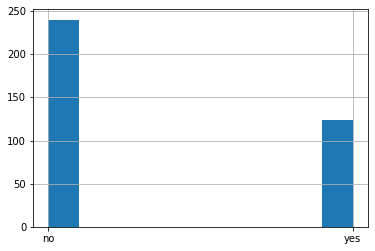

In [555]:
display(pd.DataFrame(stud['romantic'].describe(include='object')))
stud['romantic'].hist()


In [556]:
stud['romantic'].loc[(stud.romantic == 'yes')] = 1
stud['romantic'].loc[(stud.romantic == 'no')] = 0
stud.romantic = stud.romantic.astype(float)


In [557]:
display(pd.DataFrame(stud['romantic'].describe(include='object')))


,romantic
count,364.000000
mean,0.340659
std,0.474583
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [558]:
data = stud[['age', 'romantic']][stud.romantic.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby(['age'])['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,age,num
0,15,11
1,16,7
2,17,6
3,18,6
4,19,1


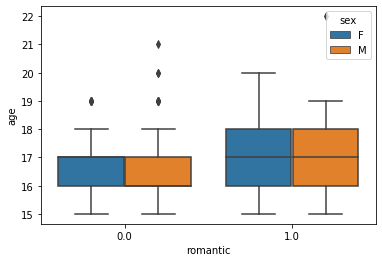

In [559]:
sns.boxplot(x='romantic',
            y='age',
            data=stud[['age', 'romantic', 'sex']],
            hue='sex')


### Привели все имеющиеся значения к числовому формату, осталось 31 пропущенное. 

## <span style="color:darkblue">семейные отношения</span>

,famrel
count,368.000000
mean,3.937500
std,0.927277
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


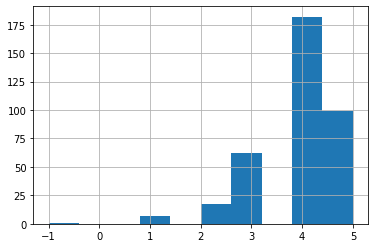

In [560]:
display(pd.DataFrame(stud['famrel'].describe(include='object')))
stud['famrel'].hist()


In [561]:
stud['famrel'].loc[(stud.famrel < 1)] = None  # заменяем некорректное значение


In [562]:
data = stud[['school', 'famrel']][stud.famrel.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,24
1,MS,4


### Убрали некорректное значение, осталось 28 пропущенных

## <span style="color:darkblue">свободное время после школы</span>

,freetime
count,384.000000
mean,3.231771
std,0.993940
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


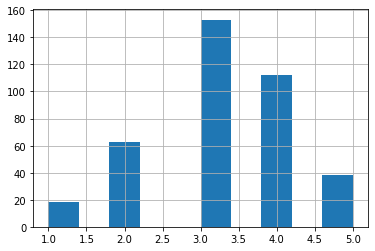

In [563]:
display(pd.DataFrame(stud['freetime'].describe(include='object')))
stud['freetime'].hist()


In [564]:
data = stud[['school', 'freetime']][stud.freetime.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,11


### В данных 11 пропусков, остальные значения корректные

## <span style="color:darkblue">проведение времени с друзьями</span>

,goout
count,387.000000
mean,3.105943
std,1.115896
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


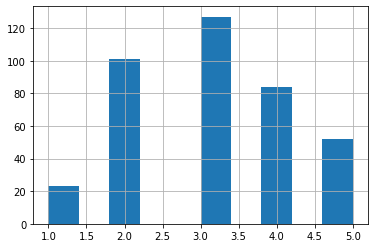

In [565]:
display(pd.DataFrame(stud['goout'].describe(include='object')))
stud['goout'].hist()


In [566]:
data = stud[['school', 'goout']][stud.goout.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,8


### В данных 8 пропусков, остальные значения корректные

## <span style="color:darkblue">текущее состояние здоровья</span>

,health
count,380.000000
mean,3.531579
std,1.396019
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


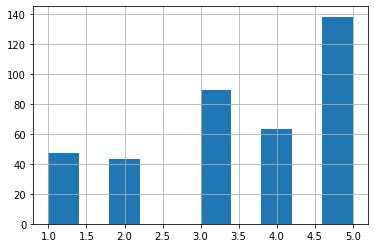

In [567]:
display(pd.DataFrame(stud['health'].describe(include='object')))
stud['health'].hist()


In [568]:
data = stud[['school', 'health']][stud.health.isna()]
# смотрим на пропуски
data['num'] = 1  # вводим счетчик для подсчета пустых значений
data.groupby('school')['num'].sum().reset_index().\
            sort_values(by='num', ascending=False)


,school,num
0,GP,15


### В данных 15 пропусков, остальные значения корректные

## <span style="color:darkblue">количество пропущенных занятий</span>

,absences
count,383.000000
mean,7.279373
std,23.465197
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


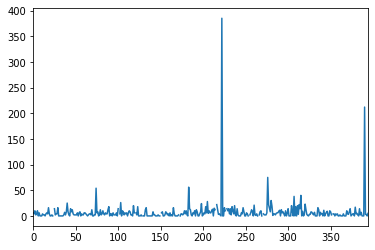

In [569]:
display(pd.DataFrame(stud['absences'].describe(include='object')))
stud['absences'].plot()


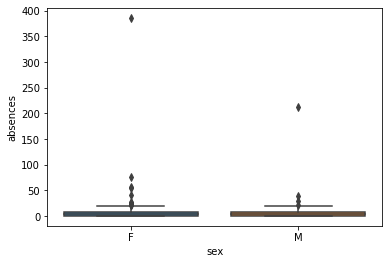

In [570]:
sns.boxplot(x='sex', y='absences', data=stud[['absences', 'sex']])


In [571]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'Межквартильный размах: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.
    format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, Межквартильный размах: 8.0,  Границы выбросов: [-12.0, 20.0].


In [572]:
stud.absences = stud.absences.astype(str).\
                apply(lambda x: None if x.strip() == '' else x).astype(float)
stud = stud.loc[(stud.absences <= 20) | (stud.absences.isna())]
# убираем выбросы


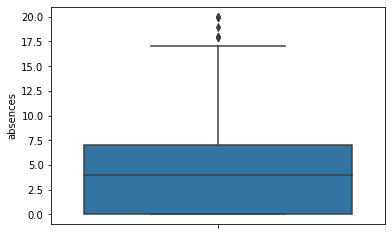

In [573]:
sns.boxplot(y='absences', data=stud[['absences']])


In [574]:
display(pd.DataFrame(stud['absences'].describe(include='object')))


,absences
count,366.000000
mean,4.603825
std,4.965512
min,0.000000
25%,0.000000
50%,4.000000
75%,7.000000
max,20.000000


### Убрали 17 выбросов, осталось 378 строк из них 12 пустых значений

## <span style="color:darkblue">баллы по госэкзамену по математике</span>

,score
count,372.000000
mean,52.231183
std,23.072493
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


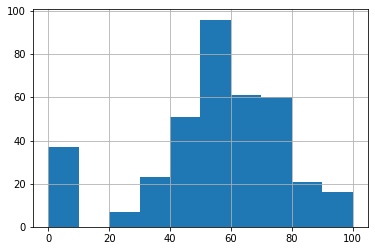

In [575]:
display(pd.DataFrame(stud['score'].describe(include='object')))
stud['score'].hist()


In [576]:
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'Межквартильный размах: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.
    format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 40.0, 75-й перцентиль: 70.0, Межквартильный размах: 30.0,  Границы выбросов: [-5.0, 115.0].


In [577]:
stud.dropna(subset=['score'])
# убираем строки без оценки - так как не сможем их проанализировать


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nan,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,nan,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [584]:
display(pd.DataFrame(stud.describe(include='object')))


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
count,378,378,378,378,378,378,378,378,378
unique,2,2,3,3,3,6,6,5,4
top,GP,F,U,GT3,T,other,other,course,mother
freq,333,195,280,249,306,127,190,135,238


In [585]:
display(pd.DataFrame(stud.describe()))


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,378.000000,378.000000,376.000000,356.000000,378.000000,359.000000,369.000000,343.000000,339.000000,364.000000,362.000000,359.000000,345.000000,348.000000,351.000000,369.000000,370.000000,363.000000,366.000000,372.000000
mean,16.664021,2.727513,2.513298,1.429775,2.044974,0.325905,0.130081,0.612245,0.427729,0.521978,0.790055,0.949861,0.840580,0.327586,3.957265,3.257453,3.108108,3.548209,4.603825,52.231183
std,1.266096,1.103327,1.083123,0.698579,0.843505,0.741562,0.336850,0.487950,0.495481,0.500204,0.407833,0.218537,0.366599,0.470009,0.895000,0.978772,1.111258,1.390483,4.965512,23.072493
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


In [586]:
# посмотрим на зависимость числовых значений
stud.corr().sort_values(by = 'score')


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
failures,0.213530,-0.257104,-0.287746,0.071388,-0.183804,1.000000,0.024757,-0.094356,-0.200379,-0.074933,-0.121547,-0.307642,-0.055517,0.084814,0.009660,0.087218,0.106159,0.092476,0.081801,-0.348271
age,1.000000,-0.179641,-0.181680,0.083660,-0.010651,0.213530,-0.242242,-0.164548,-0.045023,-0.091512,-0.110340,-0.213150,-0.105081,0.124861,0.057819,0.053455,0.150728,-0.063965,0.151493,-0.163081
romantic,0.124861,0.011721,0.003029,0.029037,0.049493,0.084814,-0.041868,0.014770,0.048862,-0.012507,0.036139,-0.126018,0.084137,1.000000,-0.086694,-0.005149,0.029822,0.024640,0.051717,-0.142992
goout,0.150728,0.052453,0.046003,0.034214,-0.039097,0.106159,-0.037655,-0.038021,0.008733,0.037452,-0.026448,-0.048233,0.120241,0.029822,0.065331,0.281941,1.000000,-0.005681,0.111587,-0.111971
schoolsup,-0.242242,-0.039373,0.051452,-0.001111,0.029964,0.024757,1.000000,0.090610,-0.038064,0.075704,0.040481,0.053489,-0.011750,-0.041868,0.004366,-0.066354,-0.037655,-0.034021,0.027838,-0.097022
health,-0.063965,-0.036236,0.027779,-0.022565,-0.085592,0.092476,-0.034021,0.028458,-0.094813,0.018101,-0.023405,0.026156,-0.085640,0.024640,0.090316,0.052142,-0.005681,1.000000,-0.014358,-0.072172
traveltime,0.083660,-0.176073,-0.164352,1.000000,-0.085004,0.071388,-0.001111,-0.012258,-0.044064,-0.002382,-0.028076,-0.078375,-0.085587,0.029037,-0.026068,-0.012638,0.034214,-0.022565,-0.051975,-0.060450
famsup,-0.164548,0.213444,0.216364,-0.012258,0.131231,-0.094356,0.090610,1.000000,0.320422,0.004382,0.063488,0.125951,0.107160,0.014770,-0.013857,-0.007784,-0.038021,0.028458,0.045971,-0.018657
activities,-0.091512,0.122593,0.118830,-0.002382,0.118585,-0.074933,0.075704,0.004382,0.028959,1.000000,-0.002775,0.094987,0.062274,-0.012507,0.049223,0.059946,0.037452,0.018101,0.011723,0.018936
freetime,0.053455,0.041025,-0.007483,-0.012638,-0.131062,0.087218,-0.066354,-0.007784,-0.079508,0.059946,-0.056252,-0.078885,0.123961,-0.005149,0.161542,1.000000,0.281941,0.052142,0.093436,0.041174


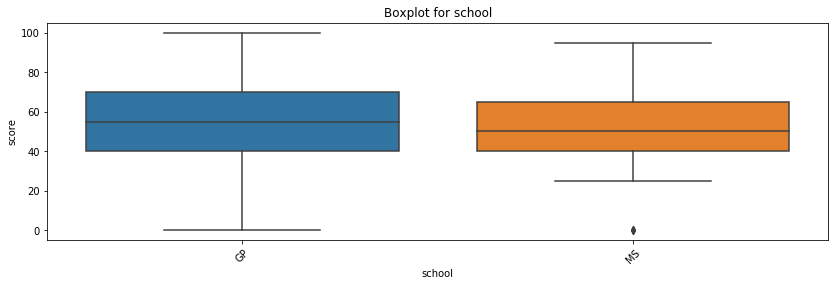

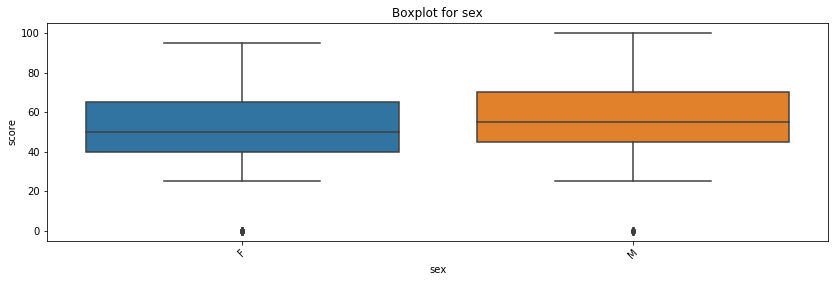

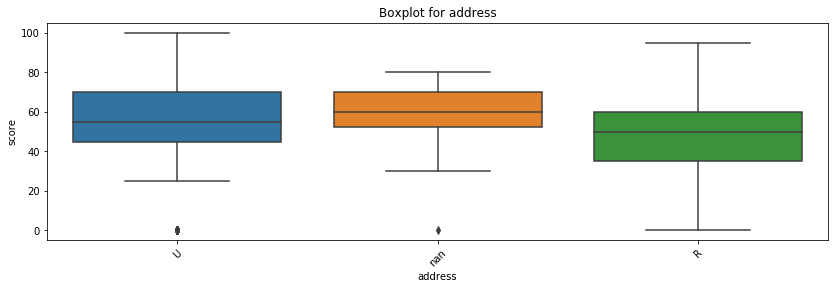

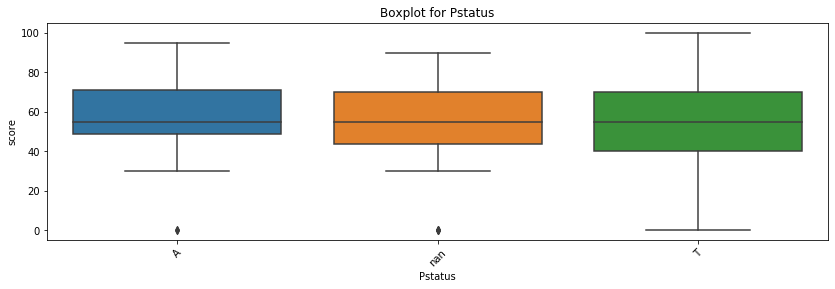

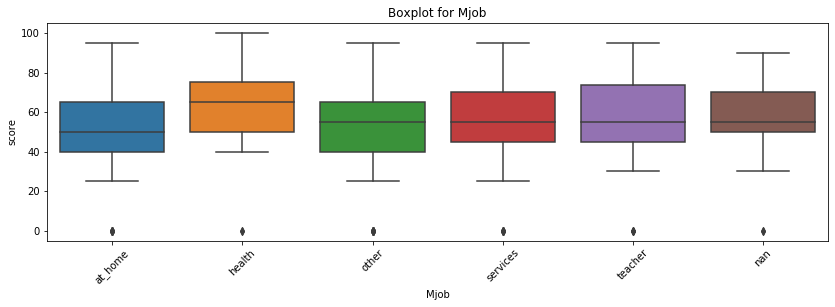

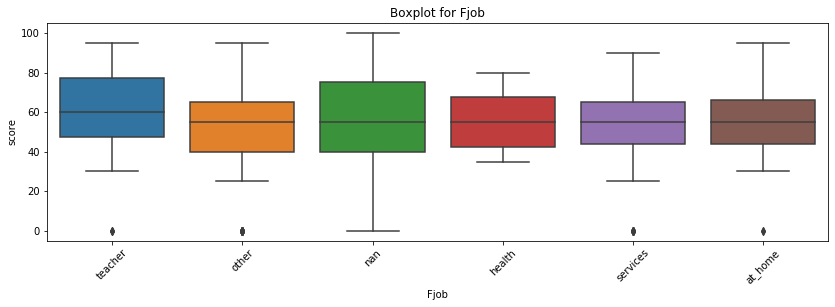

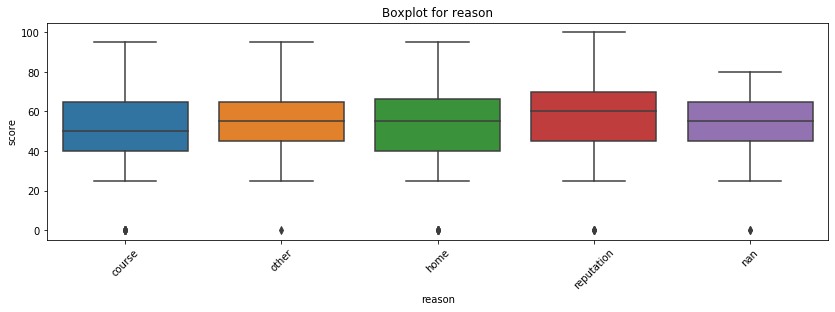

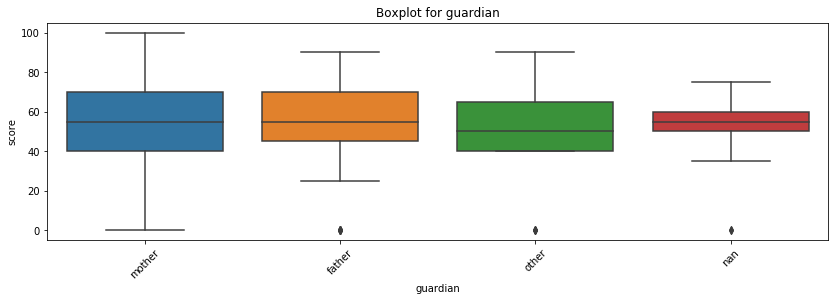

In [581]:
# строим графики для номинативных переменных
for col in ['school', 'sex', 'address', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)


In [582]:
# определяем, какие из номинативных переменных оказывают влияние на оценку
for col in ['school', 'sex', 'address', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)


C:\Users\m.kugakalova\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

C:\Users\m.kugakalova\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

C:\Users\m.kugakalova\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



### Из числовых переменных предлагаю взять 6 наиболее коррелирующих с оценкой за экзамен: failures, age, romantic, Medu, higher, Fedu, а из номинативных у нас осталась одна - sex

In [583]:
data_for_model = stud[['failures', 'age', 'romantic', 'Medu',
                       'higher', 'Fedu', 'sex', 'score']]
data_for_model.corr()


,failures,age,romantic,Medu,higher,Fedu,score
failures,1.000000,0.213530,0.084814,-0.257104,-0.307642,-0.287746,-0.348271
age,0.213530,1.000000,0.124861,-0.179641,-0.213150,-0.181680,-0.163081
romantic,0.084814,0.124861,1.000000,0.011721,-0.126018,0.003029,-0.142992
Medu,-0.257104,-0.179641,0.011721,1.000000,0.186300,0.614008,0.224340
higher,-0.307642,-0.213150,-0.126018,0.186300,1.000000,0.184233,0.189671
Fedu,-0.287746,-0.181680,0.003029,0.614008,0.184233,1.000000,0.131181
score,-0.348271,-0.163081,-0.142992,0.224340,0.189671,0.131181,1.000000


### Итак, в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

- В данных  встречаются пустые значения, в том числе и в столбце с оценкой, полностью заполненные столбцы: пол, возраст и школа. Образование матери и отца мы смогли дополнить основываясь на данных об их работе (посмотрев на наиболее встречающиеся значения среди известных)
- Выбросы найдены только в столбце с данными о пропущенных занятиях. Похоже либо кто-то очень много прогуливал, либо это ошибки в данных :)
- Для построения модели предлагаю брать наиболее скоррелированные с оценкой переменные: 'failures', 'age', 'romantic', 'Medu', 'higher', 'Fedu', 'sex'